# 推薦過程の可視化に関するソースコード
このコードには、学習済みモデルを用いた推薦過程の可視化に関する以下の機能を持ったソースコードが含まれています．


*   t-SNEを用いた埋め込みベクトルとプロトタイプベクトルの可視化
*   上位アイテムの取得
*   重みベクトルの可視化
*   影響したプロトタイプと関連するアイテムの表示





# Google Driveのマウントとワークディレクトリへの移動

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Master/research/model/
!ls

Mounted at /content/drive
/content/drive/MyDrive/Master/research/model
best_model.pth
I-ProtoMF_model.keras
item_proto_lfm2b-1mon_9e_38210573_21549076
item_proto_ml-1m_1e_38210573_38135658
item_proto_ml-1m_1e_38210573_9222eb22
item_proto_ml-1m_1e_38210573_96cf0f66
item_proto_ml-1m_1e_38210573_a26b9f1a
mf_lfm2b-1mon_08_38210573_aa2b91e4
mf_lfm2b-1mon_5a_38210573_1b4043be
mf_lfm2b-1mon_5a_38210573_270f5a7c
mf_lfm2b-1mon_5a_38210573_37455880
mf_lfm2b-1mon_5a_38210573_f5d01572
mf_lfm2b-1mon_c8_38210573_9ddefeba
MFmodel.h5
MFmodel.keras
mf_with_music_lfm2b-1mon_4e_38210573_78b6cd00
UI-ProtoMF_model.keras
U-ProtoMF_model.keras
user_item_proto_lfm2b-1mon_a1_38210573_c391a340
user_item_proto_ml-1m_34_38210573_3769f13c
user_item_proto_ml-1m_34_38210573_3dcadb68
user_item_proto_ml-1m_69_38210573_8e749356
user_item_proto_with_music_lfm2b-1mon_84_38210573_36a5f96a
user_item_proto_with_music_lfm2b-1mon_84_38210573_3e4b693e
user_item_proto_with_music_lfm2b-1mon_9c_38210573_add157c8
user_proto_lfm2b-

## パッケージの更新

In [ ]:
# scilit-learnをアップデート
!pip install -U scikit-learn

In [37]:
import sklearn
print(sklearn.__version__)
# 1.5.2

1.6.0


# 学習済みモデルから各重みの取得

In [2]:
import os
import torch
import torch.nn as nn

# 学習済みモデルが保存されている親ディレクトリパス
base_model_dir = "/content/drive/MyDrive/Master/research/model/"

# 実行名のフォルダをリストアップ
experiment_folders = [f for f in os.listdir(base_model_dir) if os.path.isdir(os.path.join(base_model_dir, f))]

# 実行名のフォルダを表示
print("Available experiment folders:")
for idx, folder in enumerate(experiment_folders):
    print(f"{idx}: {folder}")

# ユーザーが実行名のフォルダを選択
selected_idx = int(input("💡Select the experiment folder index to load the model from: "))
selected_folder = experiment_folders[selected_idx]
selected_model_path = os.path.join(base_model_dir, selected_folder, "best_model.pth")

# 選択した重みをロード
print(f"Loading model weights from: {selected_model_path}")
state_dict = torch.load(selected_model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

Available experiment folders:
0: user_proto_ml-1m_5a_38210573_ac353a9e
1: user_proto_ml-1m_5a_38210573_a3c49bfc
2: user_proto_ml-1m_5a_38210573_b6ce9068
3: user_item_proto_ml-1m_34_38210573_3dcadb68
4: user_item_proto_ml-1m_34_38210573_3769f13c
5: item_proto_ml-1m_1e_38210573_9222eb22
6: item_proto_ml-1m_1e_38210573_96cf0f66
7: item_proto_ml-1m_1e_38210573_a26b9f1a
8: item_proto_ml-1m_1e_38210573_38135658
9: mf_lfm2b-1mon_08_38210573_aa2b91e4
10: mf_lfm2b-1mon_c8_38210573_9ddefeba
11: mf_lfm2b-1mon_5a_38210573_1b4043be
12: mf_lfm2b-1mon_5a_38210573_270f5a7c
13: mf_lfm2b-1mon_5a_38210573_37455880
14: mf_lfm2b-1mon_5a_38210573_f5d01572
15: user_item_proto_ml-1m_69_38210573_8e749356
16: user_proto_lfm2b-1mon_f4_38210573_935ec310
17: user_proto_lfm2b-1mon_f4_38210573_9afb4b02
18: item_proto_lfm2b-1mon_9e_38210573_21549076
19: mf_with_music_lfm2b-1mon_4e_38210573_78b6cd00
20: user_proto_lfm2b-1mon_4e_38210573_9dd4b97e
21: user_proto_lfm2b-1mon_4e_38210573_a5945a70
22: user_item_proto_lfm2b-

U-ProtoMF

In [3]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# ユーザーのプロトタイプ（プロトタイプ空間）
user_prototypes = state_dict['user_feature_extractor.prototypes'].cpu().detach().numpy()

KeyError: 'item_feature_extractor.embedding_layer.weight'

I-ProtoMF

In [5]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# アイテムのプロトタイプ（プロトタイプ空間）
item_prototypes = state_dict['item_feature_extractor.prototypes'].cpu().detach().numpy()

KeyError: 'item_feature_extractor.embedding_layer.weight'

UI-ProtoMF

In [3]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.model_1.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.model_1.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# ユーザーとアイテムのプロトタイプ（プロトタイプ空間）
user_prototypes = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
item_prototypes = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()

# T-SNEでの可視化

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

def tsne_plot(objects: np.ndarray, prototypes: np.ndarray, object_legend_text: str = 'Object', perplexity: int = 5,
              path_save_fig: str = None):
    """
    Creates a TSNE plot to visualize the object embeddings and the prototypes in the same space.
    """
    tsne = TSNE(perplexity=perplexity, metric='cosine', init='pca', learning_rate='auto', random_state=42)

    tsne_results = tsne.fit_transform(np.vstack([prototypes, objects]))
    tsne_protos = tsne_results[:len(prototypes)]
    tsne_embeds = tsne_results[len(prototypes):]

    plt.figure(figsize=(6, 6), dpi=100)
    plt.scatter(tsne_embeds[:, 0], tsne_embeds[:, 1], s=10, alpha=0.6, c='#74add1', label=object_legend_text)
    plt.scatter(tsne_protos[:, 0], tsne_protos[:, 1], s=30, c='#d73027', alpha=0.9, label='Prototypes')

    plt.axis('off')
    plt.tight_layout()
    plt.legend(loc="upper left", prop={'size': 13})
    if path_save_fig:
        plt.savefig(path_save_fig, format='pdf')
    plt.show()


/content/drive/MyDrive/Master/research/results


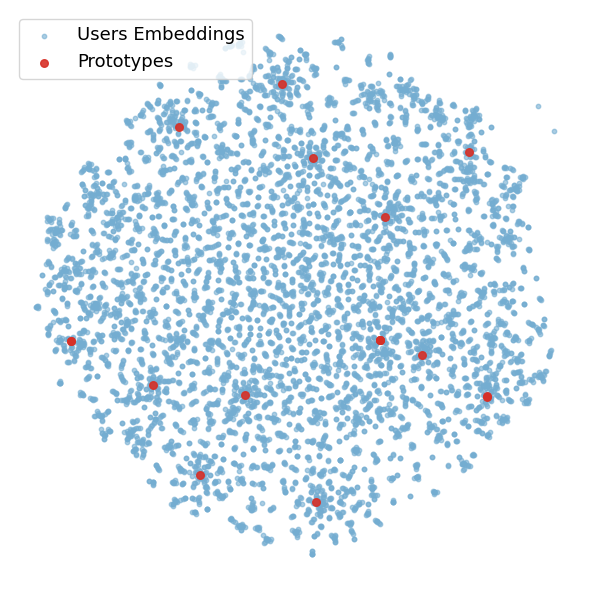

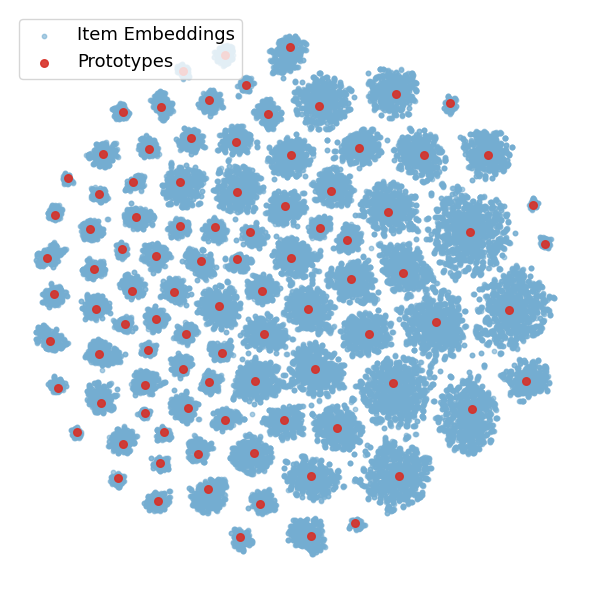

In [5]:
# T-SNE プロットの実行
# 結果保存ディレクトリへ移動
%cd /content/drive/MyDrive/Master/research/results/
tsne_plot(objects=user_embeddings, prototypes=user_prototypes, object_legend_text='Users Embeddings', perplexity=5, path_save_fig='tsne_users_and_prototypes.pdf')

tsne_plot(objects=item_embeddings, prototypes=item_prototypes, object_legend_text='Item Embeddings', perplexity=5, path_save_fig='tsne_item_and_prototypes.pdf')

# 上位アイテムの取得

In [6]:
def get_top_k_items(item_weights: np.ndarray, items_info: pd.DataFrame, proto_idx: int,
                    top_k: int = 5, invert: bool = False):
    """
    特定のプロトタイプに最も近い（または遠い）Top-Kアイテムを取得する。

    :param item_weights: Vector having, for each item, a value for each prototype. Shape is (n_items, n_prototypes)
    :param items_info: アイテム情報のデータフレーム (item_idがカラムとして含まれること)
    :param proto_idx: プロトタイプのインデックス
    :param top_k: 上位K件を取得
    :param invert: Trueにすると遠いアイテムを取得, Falseで近いアイテムを取得
    :return: Top-Kアイテム情報のDataFrame
    """
    assert proto_idx < item_weights.shape[1], \
        f'proto_idx {proto_idx} is too high compared to the number of available prototypes.'

    # プロトタイプに対するアイテムのスコアを取得
    weights_proto = item_weights[:, proto_idx]

    # スコア順にソート
    top_k_indexes = np.argsort(weights_proto if invert else -weights_proto)[:top_k]
    top_k_weights = weights_proto[top_k_indexes]

    # items_infoの行インデックスを使用してデータを取得
    item_infos_top_k = items_info.iloc[top_k_indexes].copy()
    item_infos_top_k['item weight'] = top_k_weights

    return item_infos_top_k

In [7]:
def get_top_k_prototypes_for_item(item_weights: np.ndarray, item_idx: int, top_k: int = 3):
    """
    任意のアイテムに対するスコアが高い上位K個のプロトタイプインデックスを取得します。

    :param item_weights: Vector having, for each item, a value for each prototype. Shape is (n_items, n_prototypes)
    :param item_idx: 任意のアイテムのインデックス
    :param top_k: 上位K個のプロトタイプを取得
    :return: 上位K個のプロトタイプインデックスのリスト
    """
    assert item_idx < item_weights.shape[0], "指定したアイテムインデックスが存在しません。"

    # 任意のアイテムに対するプロトタイプスコアを取得
    scores_for_item = item_weights[item_idx]

    # スコアの高い順にソートして上位Kインデックスを取得
    top_k_protos = np.argsort(-scores_for_item)[:top_k]  # 降順ソート

    return top_k_protos

# 重み可視化

値を返すver.

In [8]:
def weight_visualization(u_sim_mtx: np.ndarray, u_proj: np.ndarray, i_sim_mtx: np.ndarray, i_proj: np.ndarray,
                         annotate_top_k: int = 3):
    """
    Creates weight visualization plots which explain the recommendation of ProtoMF.
    Returns the indices of the top-k contributing prototypes.
    """
    rescale = lambda y: 1 - ((y + np.max(y)) / (np.max(y) * 2))

    # Computing the logits
    u_prods = u_sim_mtx * i_proj
    i_prods = i_sim_mtx * u_proj

    # 上位K個の寄与度が高いインデックスを取得
    u_annotate_protos = np.argsort(-u_prods)[:annotate_top_k]
    i_annotate_protos = np.argsort(-i_prods)[:annotate_top_k]

    # ユーザープロット
    u_fig, u_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(8, 8))
    u_x = np.arange(u_sim_mtx.shape[-1])

    bars_u_prods = u_axes[0].bar(u_x, u_prods, color=plt.get_cmap('coolwarm')(rescale(u_prods)))
    bars_i_proj = u_axes[1].bar(u_x, i_proj, color=plt.get_cmap('coolwarm')(rescale(i_proj)))
    bars_u_sim_mtx = u_axes[2].bar(u_x, u_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(u_sim_mtx)))

    # ユーザー側の注釈（上位Kバーに寄与値とインデックス表示）
    for idx, bars in enumerate([bars_u_prods, bars_i_proj, bars_u_sim_mtx]):
        for u_annotate_idx in u_annotate_protos:
            bar = bars[u_annotate_idx]
            height = bar.get_height()
            u_axes[idx].annotate(f'{u_annotate_idx}',
                                 (bar.get_x() + bar.get_width() / 2, height),
                                 ha='center', va='bottom', fontsize=10, color='black')

    u_axes[0].set_xlabel(r'$ {\mathbf{s}}^{\mathrm{user}}$', fontsize=24)
    u_axes[1].set_xlabel('$ \hat{\mathbf{t}} $', fontsize=24)
    u_axes[2].set_xlabel('$ \mathbf{u}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.show()

    # アイテムプロット
    i_fig, i_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(8, 8))
    i_x = np.arange(i_sim_mtx.shape[-1])

    bars_i_prods = i_axes[0].bar(i_x, i_prods, color=plt.get_cmap('coolwarm')(rescale(i_prods)))
    bars_u_proj = i_axes[1].bar(i_x, u_proj, color=plt.get_cmap('coolwarm')(rescale(u_proj)))
    bars_i_sim_mtx = i_axes[2].bar(i_x, i_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(i_sim_mtx)))

    # アイテム側の注釈（上位Kバーに寄与値とインデックス表示）
    for idx, bars in enumerate([bars_i_prods, bars_u_proj, bars_i_sim_mtx]):
        for i_annotate_idx in i_annotate_protos:
            bar = bars[i_annotate_idx]
            height = bar.get_height()
            i_axes[idx].annotate(f'{i_annotate_idx}',
                                 (bar.get_x() + bar.get_width() / 2, height),
                                 ha='center', va='bottom', fontsize=10, color='black')

    i_axes[0].set_xlabel('$ \mathbf{s}^{\mathrm{item}} $', fontsize=24)
    i_axes[1].set_xlabel('$ \hat{\mathbf{u}} $', fontsize=24)
    i_axes[2].set_xlabel('$ \mathbf{t}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.show()

    # 上位Kのインデックスを返す
    return u_annotate_protos, i_annotate_protos

In [9]:
user_embeddings = state_dict['user_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
item_embeddings = state_dict['item_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
print("user_embeddings shape:", user_embeddings.shape)
print("item_embeddings shape:", item_embeddings.shape)

user_embeddings shape: (95, 30)
item_embeddings shape: (17, 30)


In [10]:
u_proj = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
i_proj = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
print("u_proj shape:", u_proj.shape)
print("i_proj shape:", i_proj.shape)

u_proj shape: (17, 30)
i_proj shape: (95, 30)


In [11]:
user_id = 0  # 例としてユーザーID 0
item_id = 0  # 例としてアイテムID 0

user_vector = user_embeddings[user_id]
item_vector = item_embeddings[item_id]

In [12]:
import numpy as np
import torch

def adjust_sim_mtx_dims(u_sim_mtx, i_sim_mtx, n_item_prototypes, n_user_prototypes):
    # 型を確認 (numpy.ndarray として受け取った場合は torch.Tensor に変換)
    if isinstance(u_sim_mtx, np.ndarray):
        u_sim_mtx = torch.tensor(u_sim_mtx)
    if isinstance(i_sim_mtx, np.ndarray):
        i_sim_mtx = torch.tensor(i_sim_mtx)


    if u_sim_mtx.size(1) != n_item_prototypes:
        # u_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_item_prototypes + u_sim_mtx.size(1) - 1) // u_sim_mtx.size(1)
        u_sim_mtx = u_sim_mtx.repeat(1, repeat_factor)[:, :n_item_prototypes]


    if i_sim_mtx.size(1) != n_user_prototypes:
        # i_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_user_prototypes + i_sim_mtx.size(1) - 1) // i_sim_mtx.size(1)
        i_sim_mtx = i_sim_mtx.repeat(1, repeat_factor)[:, :n_user_prototypes]

    return u_sim_mtx, i_sim_mtx

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

u_sim_mtx = cosine_similarity(user_vector.reshape(1, -1), u_proj)
i_sim_mtx = cosine_similarity(item_vector.reshape(1, -1), i_proj)
print("u_sim_mtx shape:",u_sim_mtx.shape)
print("i_sim_mtx shape:",i_sim_mtx.shape)

n_user_prototypes = u_sim_mtx.shape[1]  # u_sim_mtx のプロトタイプ数
n_item_prototypes = i_sim_mtx.shape[1]
print(f"ユーザーのプロトタイプ数: {n_user_prototypes}")
print(f"アイテムのプロトタイプ数: {n_item_prototypes}")

# 次元調整
# u_sim_mtx, i_sim_mtx = adjust_sim_mtx_dims(u_sim_mtx, i_sim_mtx, n_item_prototypes, n_user_prototypes)

# u_sim_mtx=u_sim_mtx.flatten()
# i_sim_mtx=i_sim_mtx.flatten()
# u_sim_mtx = u_sim_mtx.unsqueeze(1).numpy() # (68,) -> (68, 1)
# i_sim_mtx = i_sim_mtx.unsqueeze(1).numpy() # (68,) -> (68, 1)

# u_sim_mtx=u_sim_mtx.flatten().numpy()
# i_sim_mtx=i_sim_mtx.flatten().numpy()

u_sim_mtx=u_sim_mtx.flatten()
i_sim_mtx=i_sim_mtx.flatten()

print("u_sim_mtx shape:",u_sim_mtx.shape)
print("i_sim_mtx shape:",i_sim_mtx.shape)

u_sim_mtx shape: (1, 17)
i_sim_mtx shape: (1, 95)
ユーザーのプロトタイプ数: 17
アイテムのプロトタイプ数: 95
u_sim_mtx shape: (17,)
i_sim_mtx shape: (95,)


In [14]:
import numpy as np
import torch

def adjust_proj_dims(u_proj, i_proj, n_item_prototypes, n_user_prototypes):
    # 型を確認 (numpy.ndarray として受け取った場合は torch.Tensor に変換)
    if isinstance(u_proj, np.ndarray):
        u_proj = torch.tensor(u_proj)
    if isinstance(i_proj, np.ndarray):
        i_proj = torch.tensor(i_proj)


    if u_proj.size(1) != n_item_prototypes:
        # u_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_item_prototypes + u_proj.size(1) - 1) // u_proj.size(1)
        u_proj = u_proj.repeat(1, repeat_factor)[:, :n_item_prototypes]


    if i_proj.size(1) != n_user_prototypes:
        # i_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_user_prototypes + i_proj.size(1) - 1) // i_proj.size(1)
        i_proj = i_proj.repeat(1, repeat_factor)[:, :n_user_prototypes]

    return u_proj, i_proj

In [15]:
n_user_prototypes = u_sim_mtx.shape[0]  # u_sim_mtx のプロトタイプ数
n_item_prototypes = i_sim_mtx.shape[0]
print(f"ユーザーのプロトタイプ数: {n_user_prototypes}")
print(f"アイテムのプロトタイプ数: {n_item_prototypes}")


u_proj, i_proj = adjust_proj_dims(u_proj, i_proj, n_item_prototypes, n_user_prototypes)

# u_projの変換: 平均を取って [95,] にする
u_proj = u_proj.mean(dim=0).numpy()  # shape: [95,]

# i_projの変換: 平均を取って [17,] にする
i_proj = i_proj.mean(dim=0).numpy()  # shape: [17,]

print("u_proj shape:", u_proj.shape)
print("i_proj shape:", i_proj.shape)

ユーザーのプロトタイプ数: 17
アイテムのプロトタイプ数: 95
u_proj shape: (95,)
i_proj shape: (17,)


In [16]:
# u_proj=u_proj.mean(axis=1)
# i_proj=i_proj.mean(axis=1)
# print("u_proj shape:",u_proj.shape)
# print("i_proj shape:",i_proj.shape)

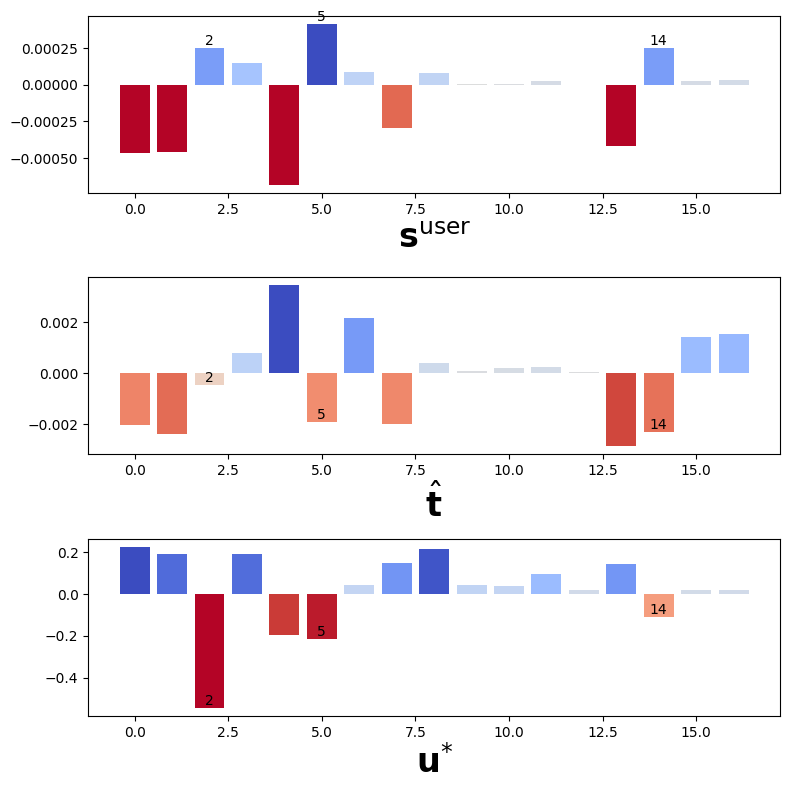

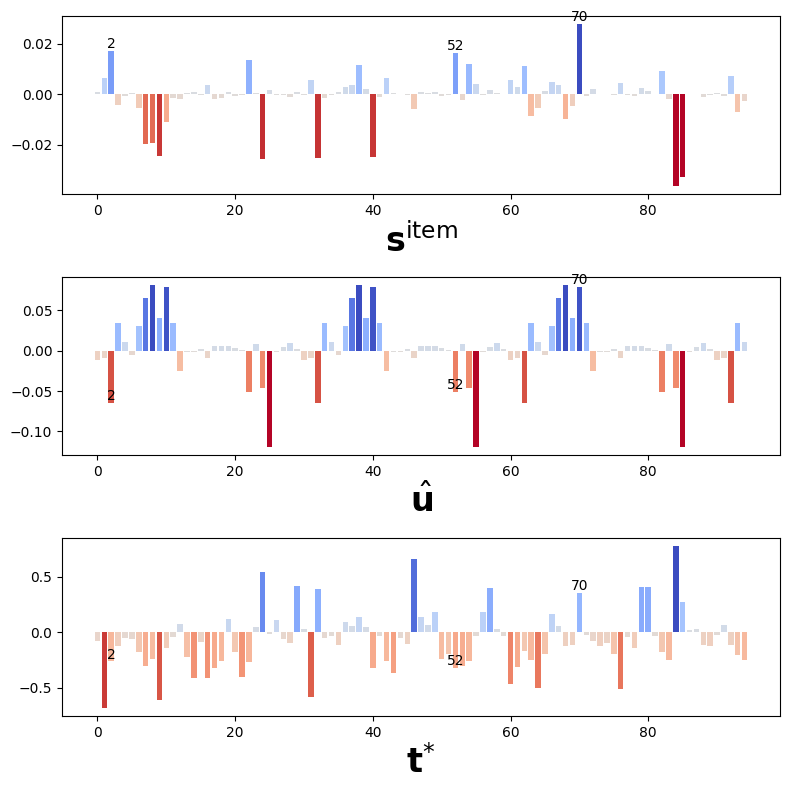

Top contributing user prototype indices: [ 5 14  2]
Top contributing item prototype indices: [70  2 52]


In [17]:
u_top_indices, i_top_indices = weight_visualization(
    u_sim_mtx=u_sim_mtx,
    u_proj=u_proj,
    i_sim_mtx=i_sim_mtx,
    i_proj=i_proj,
    annotate_top_k=3
)

print("Top contributing user prototype indices:", u_top_indices)
print("Top contributing item prototype indices:", i_top_indices)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd



# データセットを選択
dataset_type = input("データセットを選択してください (ml,lfm): ").strip().lower()

# 選択したデータセットに応じたCSVファイルのパスを設定
if dataset_type == 'ml':
    item_file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/movies.dat'
    items_info = pd.read_csv(item_file_path, sep='::', engine='python', names=['item_id', 'title', 'genres'], encoding='ISO-8859-1')

    user_file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/users.dat'
    users_info = pd.read_csv(user_file_path, sep='::', engine='python',
                            names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], encoding='ISO-8859-1')
elif dataset_type == 'lfm':
    # 'lfm'の場合には、結合したデータフレームを使用
    # 必要なCSVファイルパス
    test_path = '/content/drive/MyDrive/Master/research/ProtoMF/data/lfm2b-1mon/dataset_with_metadata/test_with_metadata.csv'
    train_path = '/content/drive/MyDrive/Master/research/ProtoMF/data/lfm2b-1mon/dataset_with_metadata/train_with_metadata.csv'
    val_path = '/content/drive/MyDrive/Master/research/ProtoMF/data/lfm2b-1mon/dataset_with_metadata/val_with_metadata.csv'

    # 3つのファイルを読み込み、結合
    dataset = pd.concat([
        pd.read_csv(test_path),
        pd.read_csv(train_path),
        pd.read_csv(val_path)
    ], ignore_index=True)

    # # デバック：結合されたデータフレームを確認
    # print(f"結合されたデータセットの行数: {len(dataset)}")
    # print(f"結合されたデータセットの列: {dataset.columns}")

    # ユーザー情報とアイテム情報を抽出する
    # アイテム情報
    items_info = dataset[['track_id', 'track', 'artist']].drop_duplicates().reset_index(drop=True)

    # ユーザー情報
    users_info = dataset[['user_id']].drop_duplicates().reset_index(drop=True)

    # # デバック：表示して確認
    # print("Items Info:")
    # print(items_info.head())

    # print("Users Info:")
    # print(users_info.head())

else:
    print("無効な入力です。ml,lfm のいずれかを入力してください。")
    exit(1)

# 表を表示
print(f"User {user_id} に対するItem {item_id} の推薦スコアに関するプロトタイプ:")

# ユーザー情報の取得
user_info = users_info.iloc[user_id]  # user_idに該当するアイテム情報

print(f"User {user_id} に対する情報:")
print(user_info)

# アイテム情報の取得
item_info = items_info.iloc[item_id]  # item_idに該当するアイテム情報

print(f"Item {item_id} に対する情報:")
print(item_info)

# 例: item_weightsの準備
item_weights = cosine_similarity(item_embeddings, item_prototypes)  # (n_items, n_prototypes)

u_proto_idxs = u_top_indices
print(u_proto_idxs)

# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in u_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_weights, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()

# 表を表示
import IPython.display as display
display.display(top_k_df)

i_proto_idxs = i_top_indices
print(i_proto_idxs)

# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in i_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_weights, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()

# 表を表示
display.display(top_k_df)

データセットを選択してください (ml,lfm): lfm
User 0 に対するItem 0 の推薦スコアに関するプロトタイプ:
User 0 に対する情報:
user_id    1453
Name: 0, dtype: int64
Item 0 に対する情報:
track_id       41515706.0
track       Times Missing
artist             Torche
Name: 0, dtype: object
[ 5 14  2]


,index,track_id,track,artist,item weight,prototype_index
0,4,20143938.0,If I Could Turn Back Time,Cher,0.165616,5
1,16,29284230.0,Of My Mind,Pional,0.078749,5
2,15,24778880.0,Loud Places (feat. Romy),Jamie xx,0.075832,5
3,2,4342413.0,All Star,Smash Mouth,0.070072,5
4,6,17504431.0,HIP,MAMAMOO,0.061000,5
5,4,20143938.0,If I Could Turn Back Time,Cher,-0.180008,14
6,11,33754316.0,Roxanne,The Police,-0.269941,14
7,2,4342413.0,All Star,Smash Mouth,-0.271918,14
8,5,40311364.0,The Opening Crescendo,...And You Will Know Us by the Trail of Dead,-0.321547,14
9,15,24778880.0,Loud Places (feat. Romy),Jamie xx,-0.337197,14


[70  2 52]


,index,track_id,track,artist,item weight,prototype_index
0,2,4342413.0,All Star,Smash Mouth,0.374922,70
1,0,41515706.0,Times Missing,Torche,0.355207,70
2,12,21142034.0,It Ain't Me Babe,Bob Dylan,0.350610,70
3,15,24778880.0,Loud Places (feat. Romy),Jamie xx,0.346882,70
4,16,29284230.0,Of My Mind,Pional,0.343087,70
5,1,17063812.0,Good as Hell,Lizzo,-0.248926,2
6,3,13258212.0,Echo Beach,Martha and the Muffins,-0.249867,2
7,8,32942985.0,Regiment - 2006 Digital Remaster,Brian Eno,-0.251180,2
8,10,7250382.0,Blue Line Baby,Nothing,-0.254547,2
9,9,39958657.0,The Hunted,Saint Asonia,-0.255562,2
